# Intro
- Use the MatchedBeerData (union of BeerAdvocate and RateBeer) for the sake of simplicity

# Reduction of the dataset
- depending of the previous result, select a reduced dataset to later work on

In [15]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

databank = './data/MatchedBeerData'
pd.set_option('display.max_columns', None)

In [3]:
users = pd.read_csv(databank + '/users.csv')
users.head()

,ba,ba.1,ba.2,ba.3,ba.4,ba.5,ba.6,rb,rb.1,rb.2,rb.3,rb.4,rb.5
0,joined,location,nbr_ratings,nbr_reviews,user_id,user_name,user_name_lower,joined,location,nbr_ratings,user_id,user_name,user_name_lower
1,1220868000.0,Germany,6,6,erzengel.248045,Erzengel,erzengel,1224324000.0,Germany,8781,83106,Erzengel,erzengel
2,1348394400.0,"United States, Virginia",1,1,gendv138.695700,GenDV138,gendv138,1385722800.0,"United States, Virginia",6240,290599,GenDV138,gendv138
3,1207303200.0,"United States, Washington",3,3,nimbleprop.208928,nimbleprop,nimbleprop,1150797600.0,"United States, Washington",7452,38859,nimbleprop,nimbleprop
4,1322737200.0,Estonia,11,0,visionthing.639993,visionthing,visionthing,1242986400.0,Estonia,5462,91324,visionthing,visionthing


In [171]:
ratings = pd.read_csv(databank + '/ratings.csv')
ratings.head()

/run/user/1000/ipykernel_7737/1090206854.py:1: DtypeWarning: Columns (0,1,2,3,5,7,8,9,10,11,13,17,18,19,20,22,24,25,26,27,29,31) have mixed types. Specify dtype option on import or set low_memory=False.
  ratings = pd.read_csv(databank + '/ratings.csv')


,ba,ba.1,ba.2,ba.3,ba.4,ba.5,ba.6,ba.7,ba.8,ba.9,ba.10,ba.11,ba.12,ba.13,ba.14,ba.15,ba.16,rb,rb.1,rb.2,rb.3,rb.4,rb.5,rb.6,rb.7,rb.8,rb.9,rb.10,rb.11,rb.12,rb.13,rb.14,rb.15
0,abv,appearance,aroma,beer_id,beer_name,brewery_id,brewery_name,date,overall,palate,rating,review,style,taste,text,user_id,user_name,abv,appearance,aroma,beer_id,beer_name,brewery_id,brewery_name,date,overall,palate,rating,style,taste,text,user_id,user_name
1,11.3,4.5,4.5,645,Trappistes Rochefort 10,207,Brasserie de Rochefort,1324810800,5.0,4.5,4.8,True,Quadrupel (Quad),5.0,Best before 27.07.2016Directly reviewed in com...,erzengel.248045,Erzengel,11.3,4.0,10.0,2360,Rochefort Trappistes 10,406,Brasserie Rochefort,1387710000,19.0,4.0,4.6,Abt/Quadrupel,9.0,a) Geruch malzig-schwer-sÃ¼Ã. Riecht schon ...,83106,Erzengel
2,5.0,NaN,NaN,28191,Myanmar Lager Beer,9369,Myanmar Brewery and Distillery,1322650800,NaN,NaN,3.0,True,American Adjunct Lager,NaN,NaN,visionthing.639993,visionthing,5.0,2.0,3.0,17109,Myanmar Lager Beer,2921,Myanmar Brewery and Distillery,1322564400,6.0,2.0,1.7,Pale Lager,4.0,"Can. Weak and watery, not the best beer of the...",91324,visionthing
3,5.0,3.5,3.5,57911,Cantillon Tyrnilambic Baie D’Argousier Lambic,388,Brasserie Cantillon,1344074400,4.0,4.0,3.85,True,Lambic - Fruit,4.0,"Bottle @ One Pint Pub, Helsinki. 2006 vintage....",tiong.608427,tiong,5.0,4.0,8.0,35298,Cantillon Tyrnilambic Baie dArgousier,1069,Cantillon,1353582000,17.0,4.0,4.1,Lambic Style - Fruit,8.0,"Bottle @ One Pint Pub, Helsinki. Originally ra...",98624,tiong
4,5.0,4.0,3.5,57913,Cantillon Pikkulinnun Viskilambic,388,Brasserie Cantillon,1344074400,4.0,4.0,3.68,True,Lambic - Unblended,3.5,"Originally rated on 16.11.2009, draught @ Pikk...",tiong.608427,tiong,5.0,4.0,8.0,113596,Cantillon Pikkulinnun Viskilambic,1069,Cantillon,1416222000,16.0,4.0,4.1,Lambic Style - Unblended,9.0,"Draught @Â Pikkulintu, Helsinki, Finland. A pr...",98624,tiong


# Show interesting metrics about people
## distribution of number of rating per user

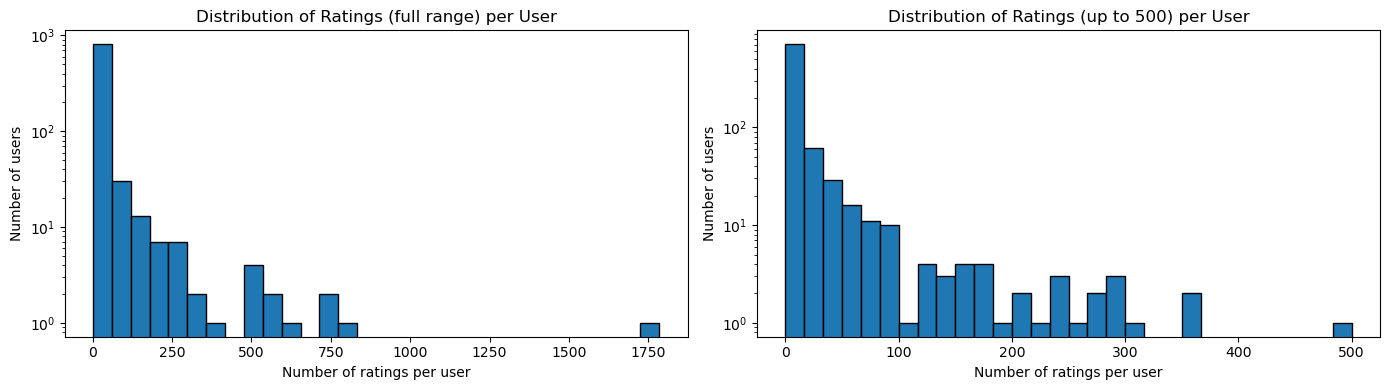

In [5]:
ratings_per_user = ratings.groupby('rb.14')['rb.14'].count()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,4))

axes[0].hist(ratings_per_user.values, bins=30, edgecolor='black')
axes[0].set_title('Distribution of Ratings (full range) per User')
axes[0].set_yscale('log')
axes[0].set_xlabel('Number of ratings per user')
axes[0].set_ylabel('Number of users')

axes[1].hist(ratings_per_user.values, range=(0, 500), bins=30, edgecolor='black')
axes[1].set_title('Distribution of Ratings (up to 500) per User')
axes[1].set_yscale('log')
axes[1].set_xlabel('Number of ratings per user')
axes[1].set_ylabel('Number of users')

plt.tight_layout()
plt.show()

## distribution of mean time period between rating per user

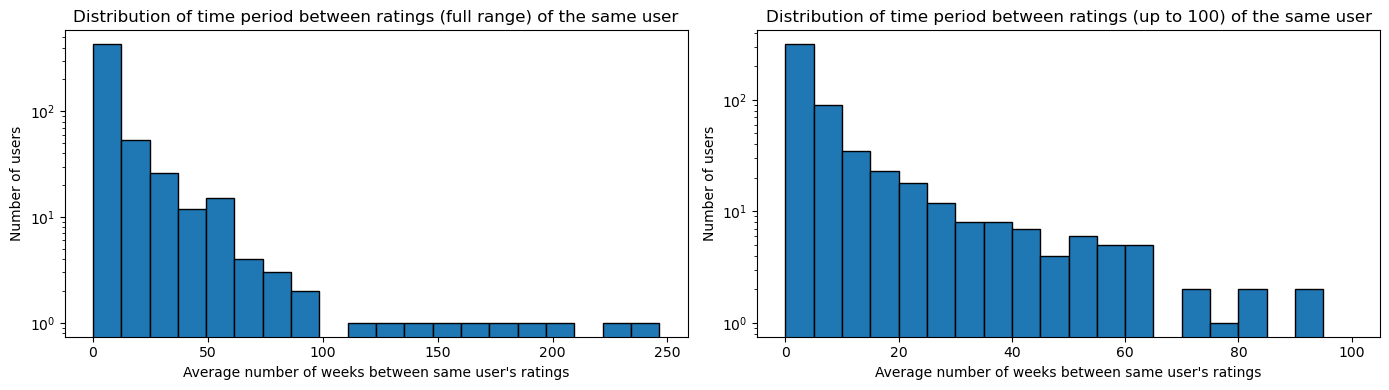

In [7]:
a = ratings.iloc[1:]
b = a.sort_values(by=['rb.14', 'rb.7'])
b['rb.7'] = b['rb.7'].apply(int)

b['time_diff'] = b.groupby('rb.14')['rb.7'].diff().dropna()
c = b.groupby('rb.14')['time_diff'].mean() / (3600 * 24 * 7)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,4))

axes[0].hist(c.values, bins=20, edgecolor='black')
axes[0].set_title('Distribution of time period between ratings (full range) of the same user')
axes[0].set_yscale('log')
axes[0].set_xlabel('Average number of weeks between same user\'s ratings')
axes[0].set_ylabel('Number of users')

axes[1].hist(c.values, bins=20, range=(0, 100), edgecolor='black')
axes[1].set_title('Distribution of time period between ratings (up to 100) of the same user')
axes[1].set_yscale('log')
axes[1].set_xlabel('Average number of weeks between same user\'s ratings')
axes[1].set_ylabel('Number of users')

plt.tight_layout()
plt.show()

## distribution of time span between first and last rating per user 

Text(0, 0.5, 'Number of users')

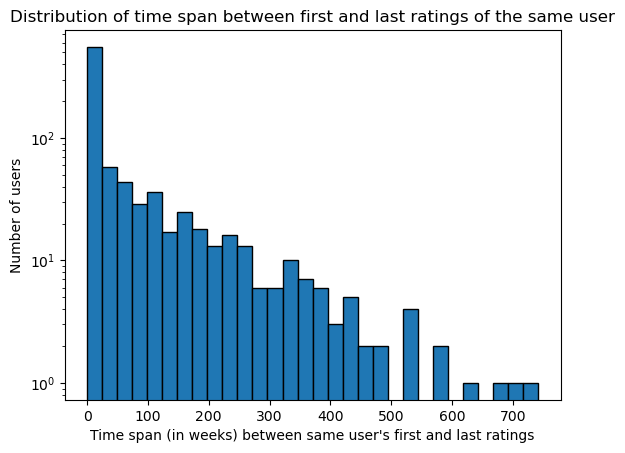

In [14]:
a = ratings.iloc[1:]
b = a.copy()
b['rb.7'] = b['rb.7'].apply(int).dropna()

c = b.groupby('rb.14')['rb.7'].apply(lambda x: max(x) - min(x)) / (3600 * 24 * 7)

plt.hist(c.values, bins=30, edgecolor='black')
plt.title('Distribution of time span between first and last ratings of the same user')
plt.yscale('log')
plt.xlabel('Time span (in weeks) between same user\'s first and last ratings')
plt.ylabel('Number of users')

One can conclude from all those graph that the ratings dataset has a heavy head

# Correlation between ratings metrics and time
## Correlation between overall rating and time

0.022123207315297336 0.6068357771814902


Text(0, 0.5, 'Number of users')

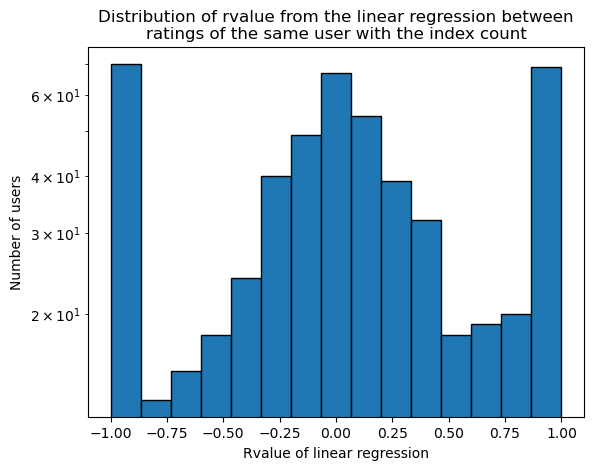

In [104]:
a = ratings.iloc[1:]
b = a.sort_values(by=['rb.14', 'rb.7'])
b['rb.10'] = b['rb.10'].apply(float).dropna()

valid_ratings_per_user = b.groupby('rb.14')['rb.10'].count()
users_to_drop = valid_ratings_per_user[valid_ratings_per_user == 1].index

c = b[~b['rb.14'].isin(users_to_drop)]
d = c.groupby('rb.14')['rb.10'].apply(lambda x: linregress(x, range(len(x))) if len(set(x)) > 1 else None)
e = d.dropna().apply(lambda x: x.rvalue)

print(e.mean(), e.std())
plt.hist(e.values, bins=15, edgecolor='black')
plt.title('Distribution of rvalue from the linear regression between\nratings of the same user with the index count')
plt.yscale('log')
plt.xlabel('Rvalue of linear regression')
plt.ylabel('Number of users')

The mean r-value mean close to 0 and std around 0.6 means that the linear model between rating and rating count is not valid 

In [207]:
lut = {value: index for index, value in enumerate(set(ratings['rb.11']))}

a = ratings.copy(deep=True)
a['rb.11'] = a['rb.11'].map(lut)
b = a.sort_values(by=['rb.14', 'rb.7'])
#c = b.groupby('rb.14')['rb.11'].cumcount()
b['cumulative_beer_list'] = b.groupby('rb.14')['rb.11'].transform(lambda x: x.expanding().apply(lambda y: list(set(y))))
#a.groupby('rb.15')['rb.7'].count().idxmax()
#print(len(ratings[ratings['rb.14'] == '11905']))
b[132]
#d = c.groupby('rb.14')['rb.10'].apply(lambda x: linregress(x, range(len(x))) if len(set(x)) > 1 else None)
#e = d.dropna().apply(lambda x: x.rvalue)

#print(e.mean(), e.std())
#plt.hist(e.values, bins=15, edgecolor='black')
#plt.title('Distribution of rvalue from the linear regression between\nratings of the same user with the index count')
#plt.yscale('log')
#plt.xlabel('Rvalue of linear regression')
#plt.ylabel('Number of users')

# Group by beer and calculate the number of unique users
#beer_variety = ratings.groupby('rb.11')['rb.14'].nunique()


TypeError: must be real number, not list

In [ ]:
from itertools import count

a = pd.Series([62, 1, 2, 1, 62, 100, 3])
b = a.rank(method='dense')
print(b)
counter = [0]
b.transform(lambda x: next(counter) if x not in counter else x) #lambda x: len(counter) if x in counter else counter++)
#lut = {value: index for index, value in enumerate(a)}
#print(lut)
#a.map(lut)